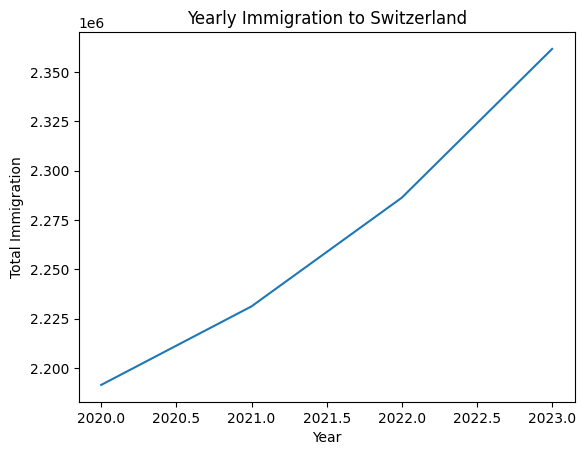

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


# Import your CSV file
immigration_data = pd.read_csv("data.csv", sep=';')
yearly_immigration = immigration_data.groupby("Annee")["NombrePersonnes"].sum()
immigration_ts = pd.Series(yearly_immigration) 


plt.plot(immigration_ts)
plt.xlabel("Year")
plt.ylabel("Total Immigration")
plt.title("Yearly Immigration to Switzerland")
plt.show()

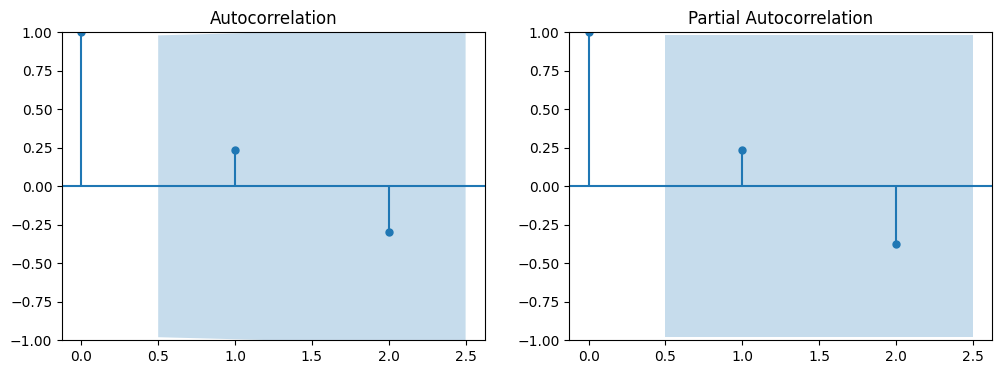

ADF Statistic: 89.3419461418615
p-value: 1.0
                               SARIMAX Results                                
Dep. Variable:        NombrePersonnes   No. Observations:                    3
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -18.973
Date:                Tue, 05 Nov 2024   AIC                             43.946
Time:                        15:41:27   BIC                             40.026
Sample:                             0   HQIC                            35.747
                                  - 3                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.023     43.289      0.000       0.955       1.045
ma.L1         -0.9892      2.089     -0.474      0.636      -5.084       3.105
sigma2 

/Users/cyriltelley/Desktop/MSE/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/.venv/lib/python3.12/site-packages/statsmodels/t

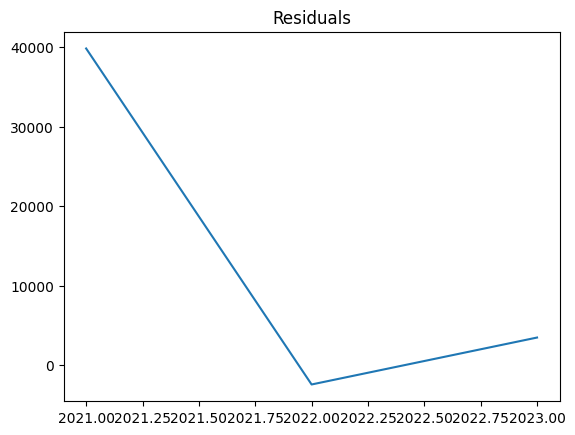

/Users/cyriltelley/Desktop/MSE/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/cyriltelley/Desktop/MSE/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


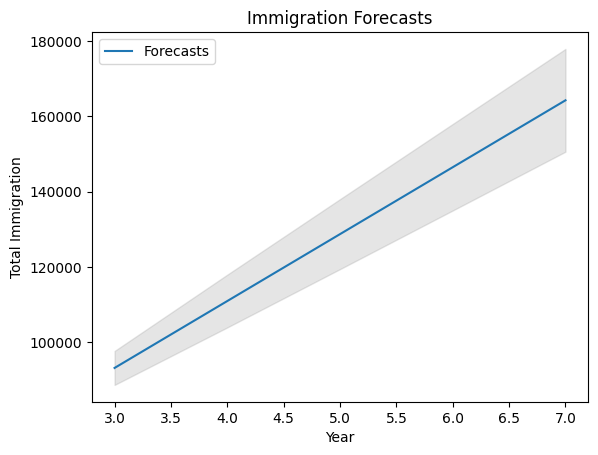

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(immigration_ts, ax=axes[0])
plot_pacf(immigration_ts, ax=axes[1])
plt.show()

result = adfuller(immigration_ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
immigration_ts_diff = immigration_ts.diff().dropna()  

model = ARIMA(immigration_ts_diff, order=(1, 1, 1))  
model_fit = model.fit()

print(model_fit.summary())
residuals = model_fit.resid
plt.plot(residuals)
plt.title("Residuals")
plt.show()

forecast_result = model_fit.get_forecast(steps=5) 
forecasts = forecast_result.predicted_mean
confidence_intervals = forecast_result.conf_int()

plt.plot(forecasts, label="Forecasts")
plt.fill_between(confidence_intervals.index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='gray', alpha=0.2)

plt.xlabel("Year")
plt.ylabel("Total Immigration")
plt.title("Immigration Forecasts")
plt.legend()
plt.show() 

